In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
os.chdir("/content/drive/MyDrive/5_AIADVANCE")
os.getcwd()

'/content/drive/MyDrive/5_AIADVANCE'

## Processing

In [ ]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Load data từ file csv
data = pd.read_csv('data_logistic.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

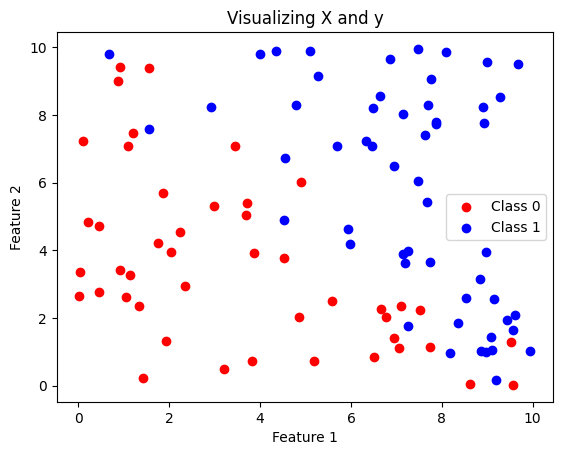

In [ ]:
import matplotlib.pyplot as plt

# Tách dữ liệu thành hai danh sách riêng biệt cho các lớp
class_0 = [x[i] for i in range(len(x)) if y[i][0] == 0]
class_1 = [x[i] for i in range(len(x)) if y[i][0] == 1]

# Trực quan hóa dữ liệu
plt.scatter([point[0] for point in class_0], [point[1] for point in class_0], color='red', label='Class 0')
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing X and y')
plt.legend()
plt.show()


## Training

In [ ]:
x_new = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=15)

# In ra số lượng mẫu trong từng tập
print("Số lượng mẫu trong tập train:", len(X_train))
print("Số lượng mẫu trong tập test:", len(X_test))

Số lượng mẫu trong tập train: 69
Số lượng mẫu trong tập test: 30


In [ ]:
print(X_train[0])

[1.         7.74652845 3.64301925]


In [ ]:
def compute_loss(y_train, y_predict):
    epsilon = 1e-10  # Giá trị rất nhỏ để thay thế cho giá trị 0
    y_predict = np.clip(y_predict, epsilon, 1 - epsilon)  # Giới hạn y_predict trong khoảng (epsilon, 1 - epsilon)

    # Xử lý y_train để đảm bảo nằm trong phạm vi từ 0 đến 1
    y_train = np.clip(y_train, 0, 1)

    # Tính toán loss function
    loss = -np.mean(np.multiply(y_train, np.log(y_predict)) + np.multiply(1 - y_train, np.log(1 - y_predict)))

    return loss

In [ ]:
def gradient(X_train.T, y_train, y_predict):
    return np.dot(X_train.T, y_predict-y_train)

In [ ]:
# Sử dụng logistic regression bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.001
for i in range(0, numOfIteration):
    # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(X_train, w))
    # cost[i] = -np.mean(np.multiply(y_train, np.log(y_predict)) + np.multiply(1-y_train, np.log(1-y_predict)))
    cost[i] = compute_loss(y_train, y_predict)
    if (np.isnan(cost[i])):
        print(y_predict)
        break
    # Gradient descent
    w = w - learning_rate * np.dot(X_train.T, y_predict-y_train)
    # print(cost[i])

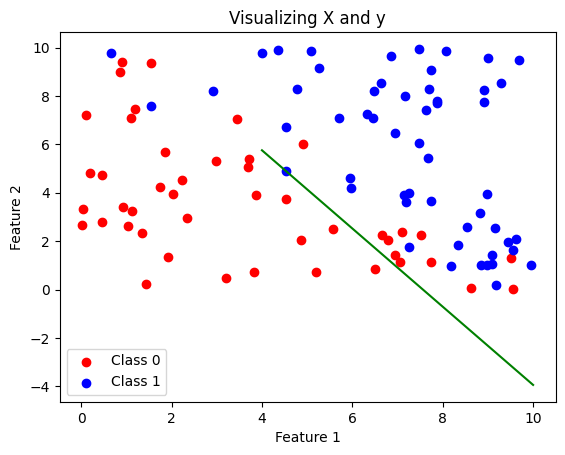

In [ ]:
# Vẽ đường phân cách.
import matplotlib.pyplot as plt

# Tách dữ liệu thành hai danh sách riêng biệt cho các lớp
class_0 = [x[i] for i in range(len(x)) if y[i][0] == 0]
class_1 = [x[i] for i in range(len(x)) if y[i][0] == 1]

# Trực quan hóa dữ liệu
plt.scatter([point[0] for point in class_0], [point[1] for point in class_0], color='red', label='Class 0')
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing X and y')
plt.legend()
# plt.show()

t = 0.5
plt.plot((4, 10), (-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

In [ ]:
# Lưu weight dùng numpy.save(), định dạng '.npy'
np.save('weight_logistic.npy', w)

# Load weight từ file '.npy'
w = np.load('weight_logistic.npy')

In [ ]:
print(w)

[[-4.14506164]
 [ 0.5482524 ]
 [ 0.33916215]]


In [ ]:
y_predict_test = sigmoid(np.dot(X_test, w))

In [ ]:
# print(y_predict_test)
y_result = [0 if i<0.5 else 1 for i in y_predict_test]
print(y_result)

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [ ]:
print(y_test.reshape(1, -1)[0])

[1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1.]


In [ ]:
from sklearn.metrics import accuracy_score

# Tính độ chính xác
accuracy = accuracy_score(y_test.reshape(1, -1)[0], y_result)

print("Độ chính xác:", accuracy)

Độ chính xác: 0.8333333333333334


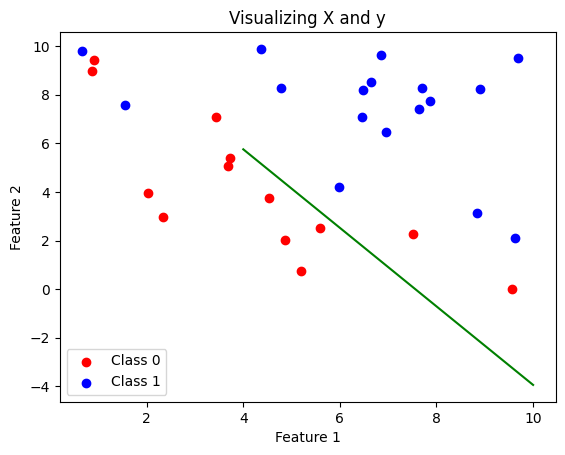

In [ ]:
# Vẽ đường phân cách.
import matplotlib.pyplot as plt

# Tách dữ liệu thành hai danh sách riêng biệt cho các lớp
class_0 = [X_test[i][1:] for i in range(len(X_test)) if y_test[i][0] == 0]
class_1 = [X_test[i][1:] for i in range(len(X_test)) if y_test[i][0] == 1]

# Trực quan hóa dữ liệu
plt.scatter([point[0] for point in class_0], [point[1] for point in class_0], color='red', label='Class 0')
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing X and y')
plt.legend()
# plt.show()

t = 0.5
plt.plot((4, 10), (-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

## Predict

In [ ]:
def predict(X_test):
    y_predict_test = sigmoid(np.dot(X_test, w))
    return [0 if i<0.5 else 1 for i in y_predict_test]

In [ ]:
print(predict(X_test))

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [ ]:
# dự đoán học 6 giờ và ngủ 4 giờ thì như thế nào?

# số giờ học và ngủ
h1 = 6
h2 = 4
print(f'nếu học {h1} giờ và ngủ {h2} giờ thì ', end="")
print("pass" if predict([1, h1, h2])[0] else "fail")

nếu học 6 giờ và ngủ 4 giờ thì pass


## Vẽ biểu đồ hàm loss_function

In [ ]:
print(len(cost))

1000


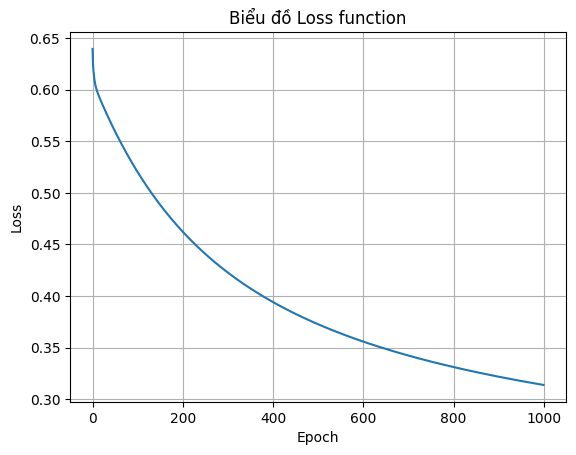

In [ ]:
plt.plot(cost)
plt.title('Biểu đồ Loss function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Tính Accuracy, F1, Recall, Precision

In [ ]:
print("Số lượng tập test: ", len(y_test))

Số lượng tập test:  30


In [ ]:
y_result_new = np.array(list(map(int, y_result)))
y_test_new = np.array(list(map(int, y_test.reshape(1, -1)[0])))
print(y_result_new)
print(y_test_new)

[0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1]
[1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1]


In [ ]:
TP = np.sum((y_result_new==1) & (y_test_new==1))
TN = np.sum((y_result_new==0) & (y_test_new==0))
FP = np.sum((y_result_new==1) & (y_test_new==0))
FN = np.sum((y_result_new==0) & (y_test_new==1))

In [ ]:
print(TP)
print(TN)
print(FP)
print(FN)

15
10
3
2


In [ ]:
def recall(TP, FN):
    return TP / (TP + FN)

def precision(TP, FP):
    return TP / (TP + FP)

def f1_score(TP, FP, FN):
    prec = precision(TP, FP)
    rec = recall(TP, FN)
    return 2 * (prec * rec) / (prec + rec)

def accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

In [ ]:
recall_value = recall(TP, FN)
precision_value = precision(TP, FP)
f1_value = f1_score(TP, FP, FN)
accuracy_value = accuracy(TP, TN, FP, FN)

print("Recall:", recall_value)
print("Precision:", precision_value)
print("F1 Score:", f1_value)
print("Accuracy:", accuracy_value)

Recall: 0.8823529411764706
Precision: 0.8333333333333334
F1 Score: 0.8571428571428571
Accuracy: 0.8333333333333334
